# Application of GAS method
In this page, we will show how to use the GAS method for a function, and the intuition why GAS is more robust in some cases by introducing a toy example.

In [45]:
import numpy as np
import numpy.random as R
import math
import matplotlib.pyplot as plt

import global_as

## Test function
Our test function is defined as: 
$$f(\mathbf z)=z_1+\sum_{i=2}^{10}{0.1\sin(kz_i)},\mathbf z\sim N(\pmb 0,\mathbf{I_{10}}).$$

Here $k=1$ or $20$. When $k$ gets larger, we will get larger partial derivatives, thus active subspace method cannot capture the main linear pattern of the function.
### k=1
Define the function as below.

In [46]:
dim = 10
chi = 10000
def Func(x):
    dim = x.shape[1]
    return x[:,0]+0.1*np.sum(np.sin(k*x[:,1:]), axis = 1) #+noise#

For active subspace method, we use finite difference method to approximate the derivatives, and plot the 1st estimated eigenvector.

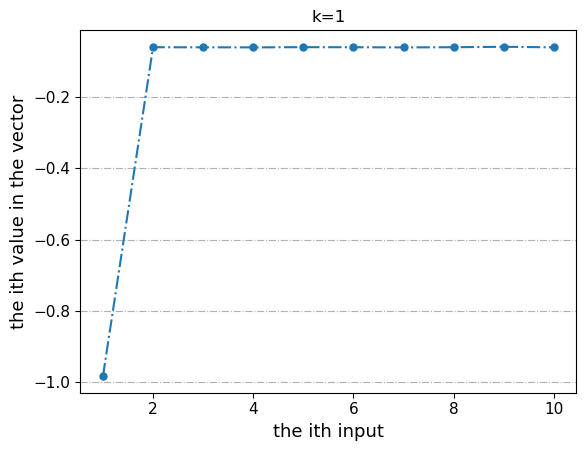

In [47]:
epsilon = 0.000001
def dFunc(x):
    xe = np.tile(x.transpose(), dim).transpose()+np.repeat(np.array(np.identity(dim)*epsilon), chi, axis=0)
    return ((Func(xe)-np.tile(Func(x),dim))/epsilon).reshape(dim,chi)

def plotAS(k):
    z = R.normal(0, 1, (10000, dim))
    deriv = dFunc(z)
    deriv /= np.mean(abs(deriv))
    u0, s0, vh0 = np.linalg.svd(deriv.astype(float), full_matrices=True) 
    s0 = s0**2
    x=np.arange(1,1+dim,1)
    fig,ax=plt.subplots(figsize=(6.4,4.8), dpi=100)
    colorc=plt.rcParams['axes.prop_cycle'].by_key()['color']
    ax.plot(x,u0[:10,0], linestyle='-.', marker='.', markersize='10')
    ax.set_xlabel('the ith input', fontsize=13)
    ax.set_ylabel('the ith value in the vector', fontsize=13)
    ax.tick_params(axis='both', labelsize=11)
    ax.yaxis.grid(True, linestyle='-.')
    plt.title('k='+str(k)) 
    plt.show()

k = 1
plotAS(k)

For global active subspace method, we use the global_as python file, and get the same result with active subspace method. 

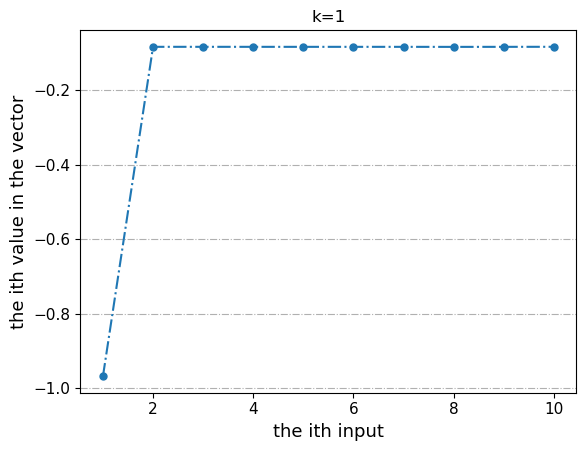

In [48]:
M2=1
shiftedSobol=True
def plotGAS(k):
    u, s = global_as.GAS(Func,dim,chi,int(chi/M2),M2,shiftedSobol)

    x=np.arange(1,1+dim,1)
    fig,ax=plt.subplots(figsize=(6.4,4.8), dpi=100)
    colorc=plt.rcParams['axes.prop_cycle'].by_key()['color']
    ax.plot(x,u[:10,0], linestyle='-.', marker='.', markersize='10')
    ax.set_xlabel('the ith input', fontsize=13)
    ax.set_ylabel('the ith value in the vector', fontsize=13)
    ax.tick_params(axis='both', labelsize=11)
    ax.yaxis.grid(True, linestyle='-.')
    plt.title('k='+str(k)) 
    plt.show()

k = 1
plotGAS(k)

### k=20
When $k$ gets larger, we find that active subspace method gets the direction with the 1st coefficient to be $0$, which means it believes the most important direction is completely not related to $z_1$, and the linear pattern is lost.

For global active subspace method, we still find the linear pattern successfully.

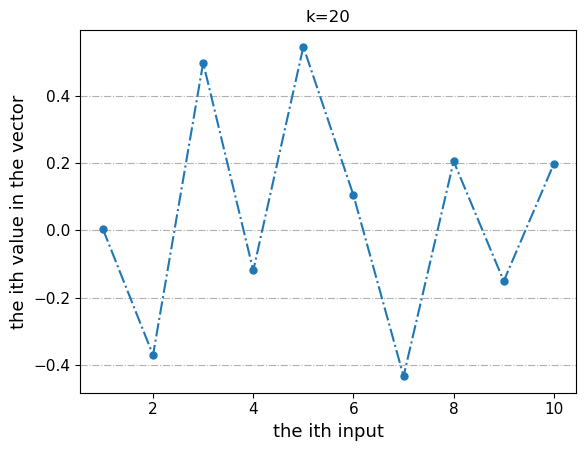

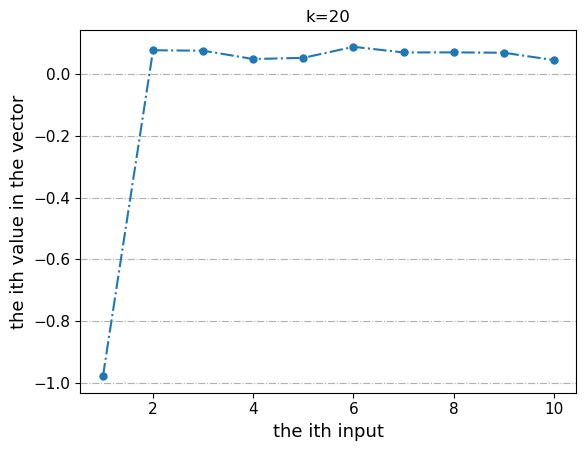

In [49]:
k = 20
plotAS(k)
plotGAS(k)